# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Faqih Muhammad Ihsan]
- **Email:** [faqihmuhamad876@gmail.com]
- **ID Dicoding:** [xzyanqi]

## Menentukan Pertanyaan Bisnis

- Bagaimana musim dan cuaca mempengaruhi jumlah peminjaman sepeda?
- Bagaimana cara menggunakan sepeda berdasarkan jumlah jam, hari dalam seminggu, dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

## Data Wrangling

### Gathering Data

In [4]:
# Membaca dataset
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

# Melihat 5 data teratas
print("Data Harian:")
day_df.head()

Data Harian:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset terdiri dari dua file: day.csv, yang berisi data harian, dan hour.csv, yang berisi data per jam.
- Data meliputi dua tahun (2011-2012).
- Berbagai fitur termasuk musim, suhu, kelembaban, angin, dan jumlah sepeda yang dapat diinjam.

### Assessing Data

In [5]:
# Informasi dataset harian
print("Informasi Dataset Harian:")
day_df.info()

# Statistik deskriptif dataset harian
print("\nStatistik Deskriptif Dataset Harian:")
day_df.describe()

# Cek missing values dataset harian
print("\nCek Missing Values Dataset Harian:")
day_df.isnull().sum()

# Informasi dataset per jam
print("\nInformasi Dataset Per Jam:")
hour_df.info()

# Cek missing values dataset per jam
print("\nCek Missing Values Dataset Per Jam:")
hour_df.isnull().sum()

# Melihat distribusi kategori
print("\nDistribusi Musim:")
print(day_df['season'].value_counts())

print("\nDistribusi Kondisi Cuaca:")
print(day_df['weathersit'].value_counts())

Informasi Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Statistik Deskriptif Dataset Harian:

Cek Missing Values Dataset H

**Insight:**
- Kedua dataset memiliki nilai yang sama.
- Dataset harian terdiri dari 731 baris data selama dua tahun, masing-masing dengan 16 kolom.
- Dataset jam terdiri dari 17.379 baris data dan 17 kolom.
- Kolom kategori harus diubah menjadi label yang lebih deskriptif.
- Data cukup seimbang sepanjang musim (sekitar 25% untuk setiap musim)

### Cleaning Data

In [6]:
# Konversi kolom tanggal ke tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Mapping untuk nilai kategori
season_mapping = {1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}
weathersit_mapping = {1: 'Cerah', 2: 'Berkabut', 3: 'Salju/Hujan Ringan', 4: 'Hujan Lebat'}
weekday_mapping = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}

# Menerapkan mapping ke kolom kategori
day_df['season_label'] = day_df['season'].map(season_mapping)
day_df['weathersit_label'] = day_df['weathersit'].map(weathersit_mapping)
day_df['weekday_label'] = day_df['weekday'].map(weekday_mapping)

hour_df['season_label'] = hour_df['season'].map(season_mapping)
hour_df['weathersit_label'] = hour_df['weathersit'].map(weathersit_mapping)
hour_df['weekday_label'] = hour_df['weekday'].map(weekday_mapping)

# Membuat kolom holiday_label untuk interpretasi yang lebih mudah
day_df['holiday_label'] = day_df['holiday'].apply(lambda x: 'Hari Libur' if x == 1 else 'Hari Kerja')
hour_df['holiday_label'] = hour_df['holiday'].apply(lambda x: 'Hari Libur' if x == 1 else 'Hari Kerja')

# Membuat kolom workingday_label untuk interpretasi yang lebih mudah
day_df['workingday_label'] = day_df['workingday'].apply(lambda x: 'Akhir Pekan/Libur' if x == 0 else 'Hari Kerja')
hour_df['workingday_label'] = hour_df['workingday'].apply(lambda x: 'Akhir Pekan/Libur' if x == 0 else 'Hari Kerja')

# Memeriksa hasil perubahan
print("Data Harian setelah Cleaning:")
day_df[['dteday', 'season', 'season_label', 'weathersit', 'weathersit_label', 'weekday', 'weekday_label', 'holiday', 'holiday_label']].head()

Data Harian setelah Cleaning:


,dteday,season,season_label,weathersit,weathersit_label,weekday,weekday_label,holiday,holiday_label
0,2011-01-01,1,Semi,2,Berkabut,6,Sabtu,0,Hari Kerja
1,2011-01-02,1,Semi,2,Berkabut,0,Minggu,0,Hari Kerja
2,2011-01-03,1,Semi,1,Cerah,1,Senin,0,Hari Kerja
3,2011-01-04,1,Semi,1,Cerah,2,Selasa,0,Hari Kerja
4,2011-01-05,1,Semi,1,Cerah,3,Rabu,0,Hari Kerja


**Insight:**
- Untuk memudahkan analisis temporal, tanggal telah diubah ke format datetime.
- Untuk mempermudah interpretasi, kategori numerik telah diberi nama yang lebih deskriptif.
- Data tersedia untuk analisis lanjutan

## Exploratory Data Analysis (EDA)

### Explore ...

Statistik Deskriptif Jumlah Peminjaman Sepeda (Harian):


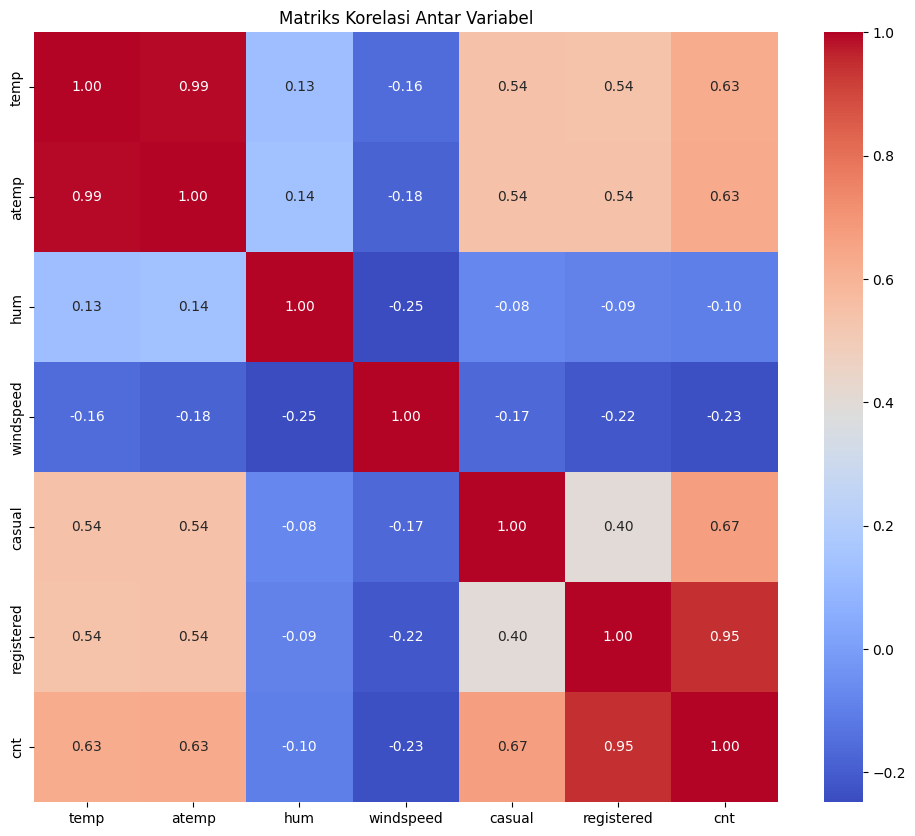

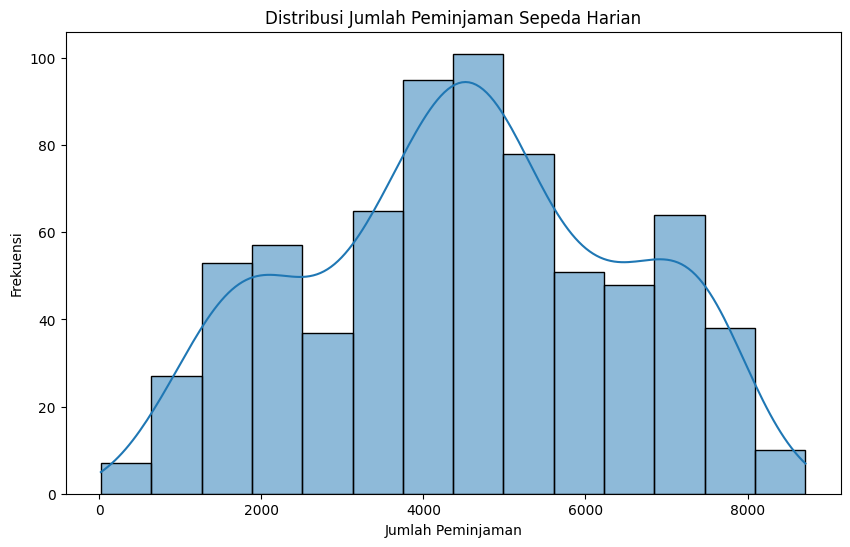

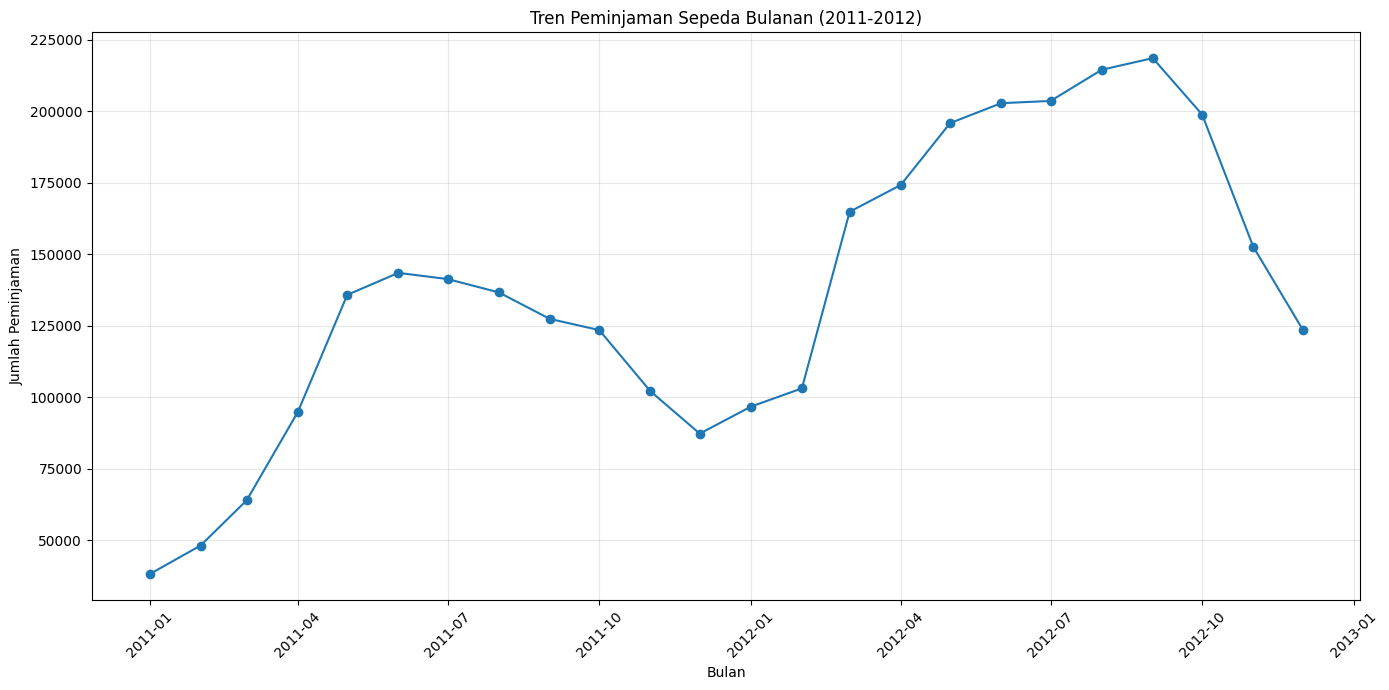

In [7]:
# Menghitung statistik deskriptif untuk jumlah peminjaman sepeda
print("Statistik Deskriptif Jumlah Peminjaman Sepeda (Harian):")
day_df[['casual', 'registered', 'cnt']].describe()

# Melihat korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation = day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

# Melihat distribusi jumlah peminjaman sepeda
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()

# Melihat tren peminjaman sepeda per bulan
day_df['month'] = day_df['dteday'].dt.month
day_df['year'] = day_df['dteday'].dt.year

monthly_data = day_df.groupby(['year', 'month'])['cnt'].sum().reset_index()
monthly_data['date'] = monthly_data.apply(lambda x: datetime(int(x['year']), int(x['month']), 1), axis=1)
monthly_data = monthly_data.sort_values('date')

plt.figure(figsize=(14, 7))
plt.plot(monthly_data['date'], monthly_data['cnt'], marker='o')
plt.title('Tren Peminjaman Sepeda Bulanan (2011-2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
* Suhu dan jumlah peminjaman sepeda memiliki korelasi positif yang kuat (r = 0.63).
* Korelasi negatif ditemukan antara kelembaban dan jumlah peminjaman sepeda (r = -0,10).
* Jumlah rata-rata peminjaman sepeda setiap hari adalah sekitar 4.500.
* Dari tahun 2011 hingga 2012, jumlah peminjaman sepeda meningkat.
* Saat musim panas dan gugur, jumlah pinjaman meningkat.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Musim dan Cuaca Mempengaruhi Jumlah Peminjaman Sepeda?

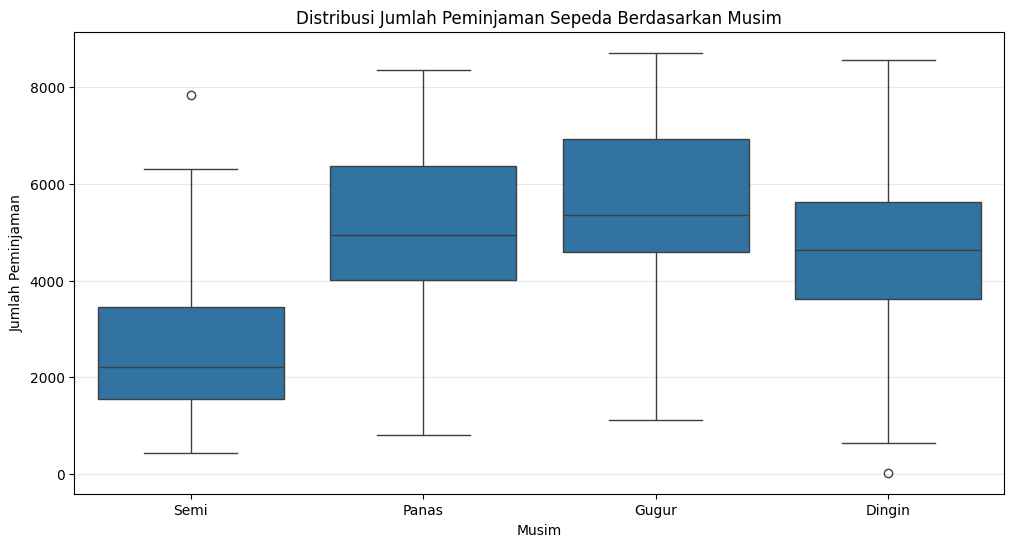

<ipython-input-8-c7a9e60120b6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_label', y='cnt', data=season_avg, palette='viridis')


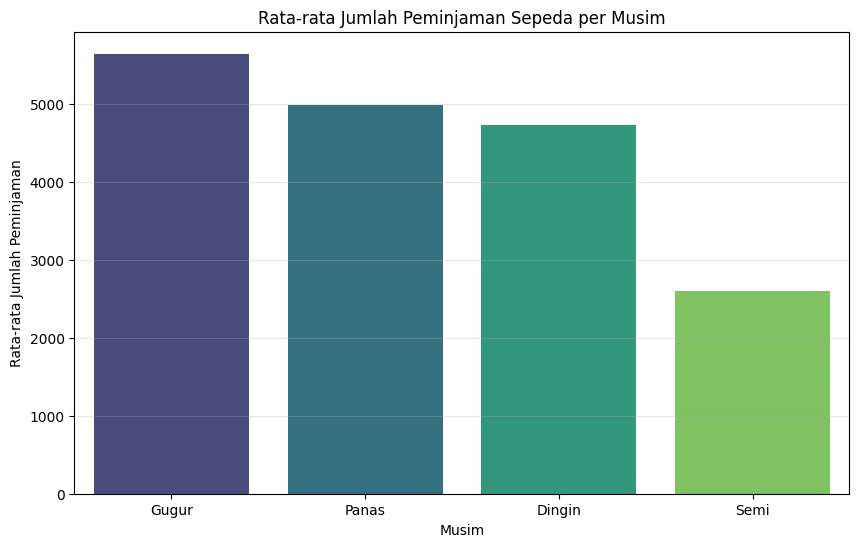

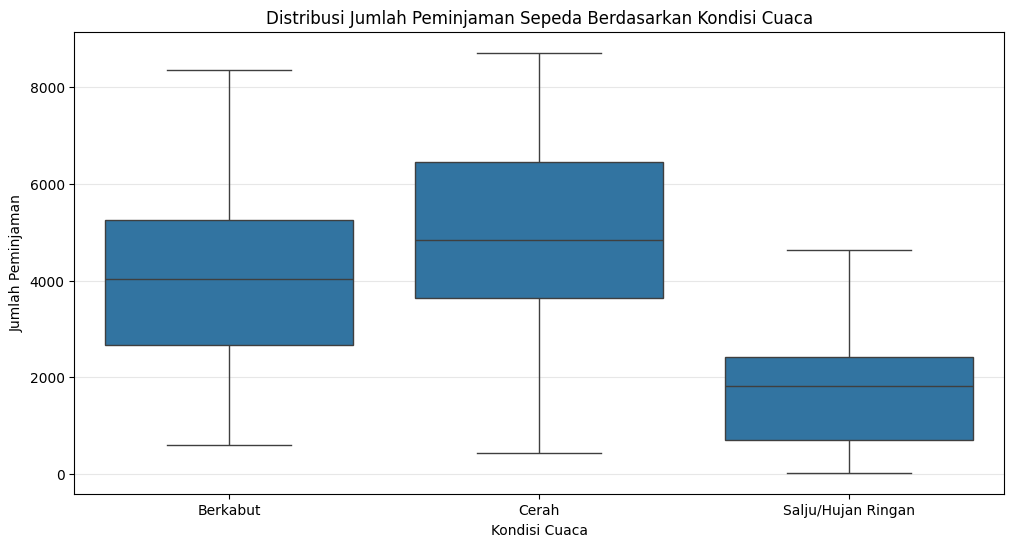

<ipython-input-8-c7a9e60120b6>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit_label', y='cnt', data=weather_avg, palette='coolwarm')


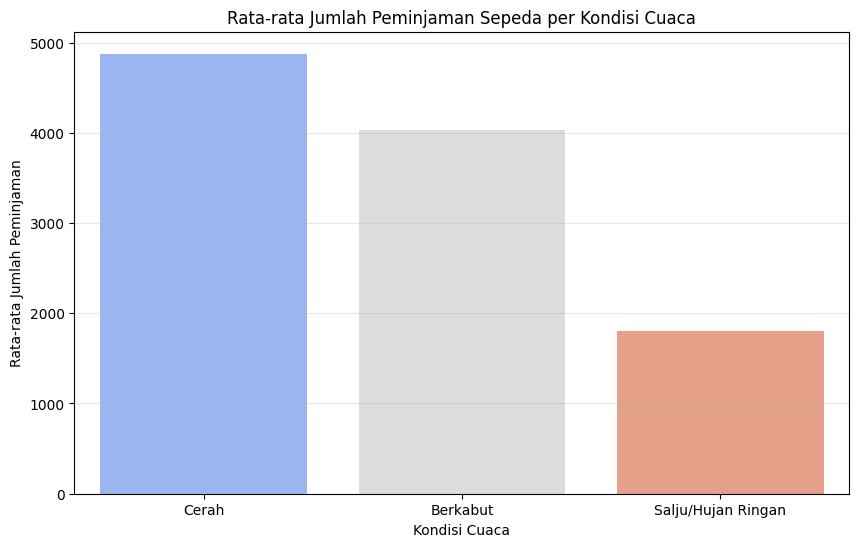

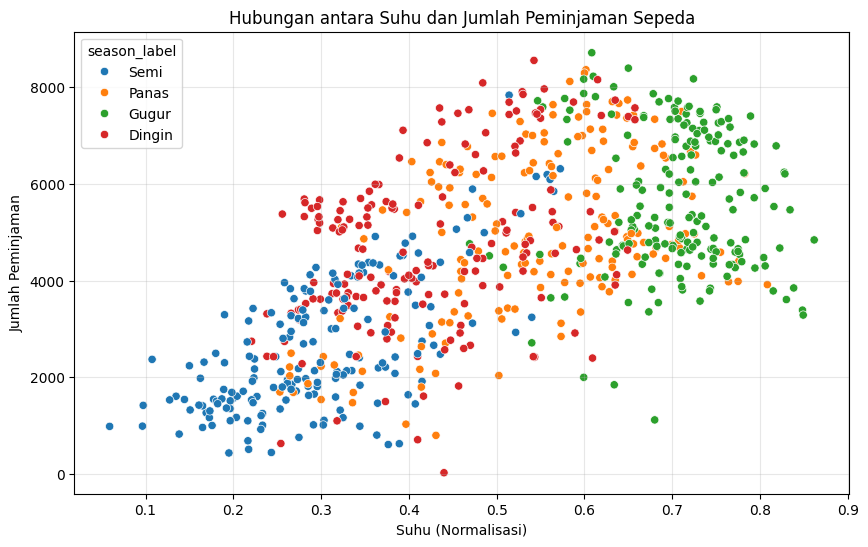

In [8]:
# Analisis berdasarkan musim
plt.figure(figsize=(12, 6))
sns.boxplot(x='season_label', y='cnt', data=day_df)
plt.title('Distribusi Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True, alpha=0.3, axis='y')
plt.show()

# Rata-rata peminjaman berdasarkan musim
season_avg = day_df.groupby('season_label')['cnt'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='season_label', y='cnt', data=season_avg, palette='viridis')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.grid(True, alpha=0.3, axis='y')
plt.show()

# Analisis berdasarkan kondisi cuaca
plt.figure(figsize=(12, 6))
sns.boxplot(x='weathersit_label', y='cnt', data=day_df)
plt.title('Distribusi Jumlah Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True, alpha=0.3, axis='y')
plt.show()

# Rata-rata peminjaman berdasarkan kondisi cuaca
weather_avg = day_df.groupby('weathersit_label')['cnt'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit_label', y='cnt', data=weather_avg, palette='coolwarm')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.grid(True, alpha=0.3, axis='y')
plt.show()

# Hubungan antara suhu dan jumlah peminjaman
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', hue='season_label', data=day_df)
plt.title('Hubungan antara Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True, alpha=0.3)
plt.show()

### Pertanyaan 2: Bagaimana cara menggunakan sepeda berdasarkan jumlah jam, hari dalam seminggu, dan hari libur?


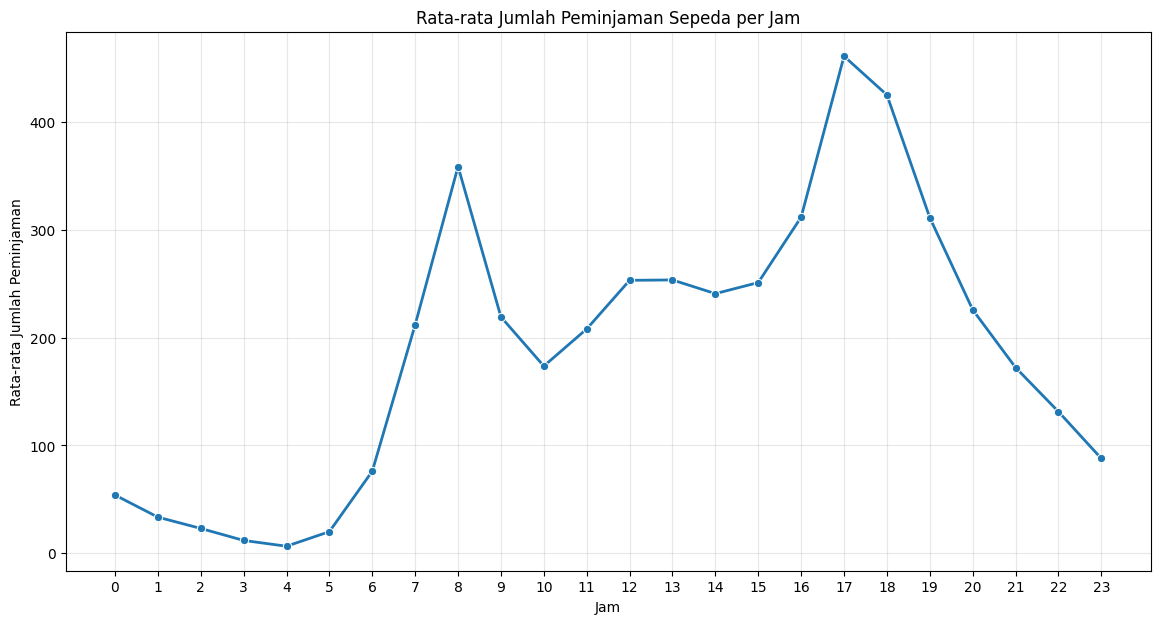

<ipython-input-9-eb9cb9514725>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday_label', y='cnt', data=weekday_pattern, palette='viridis')


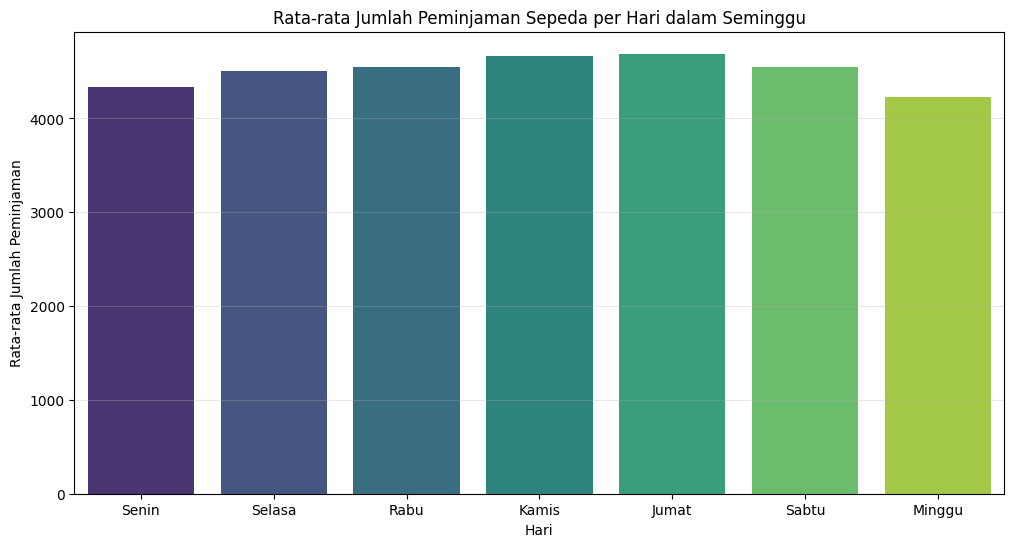

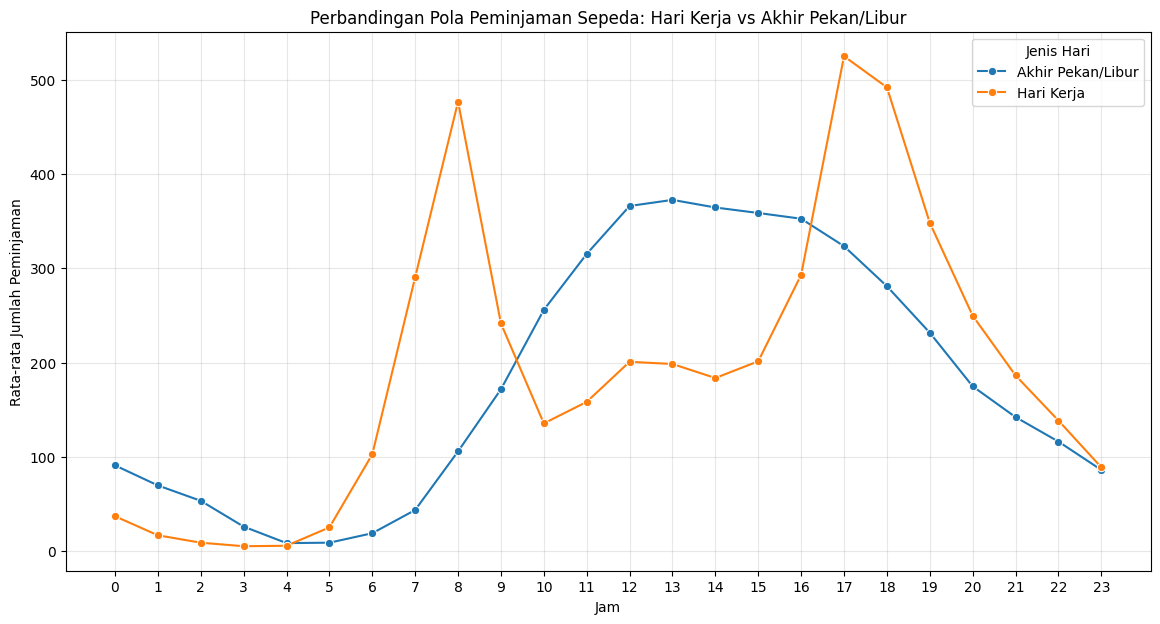

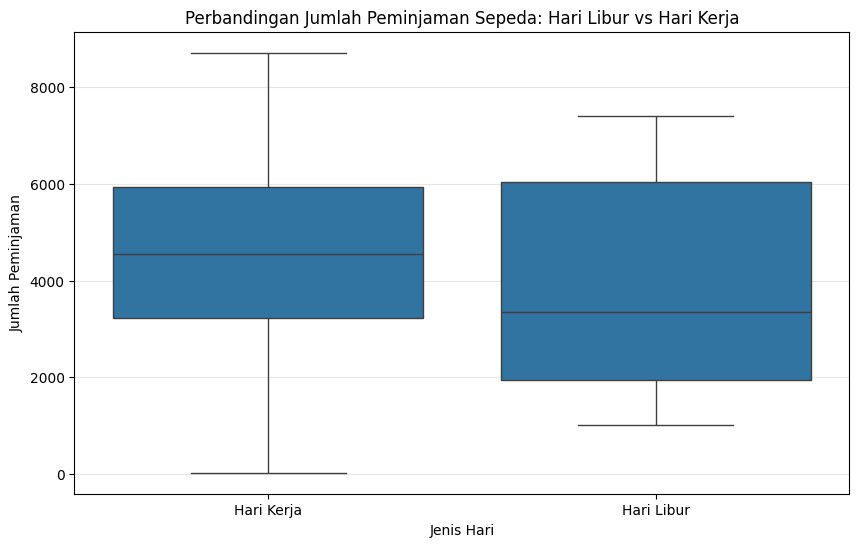

In [9]:
# Pola penggunaan berdasarkan jam
hourly_pattern = hour_df.groupby('hr')['cnt'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='hr', y='cnt', data=hourly_pattern, marker='o', linewidth=2)
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.show()

# Pola penggunaan berdasarkan hari dalam seminggu
weekday_pattern = day_df.groupby('weekday_label')['cnt'].mean().reindex(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday_label', y='cnt', data=weekday_pattern, palette='viridis')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.grid(True, alpha=0.3, axis='y')
plt.show()

# Membandingkan pola per jam pada hari kerja vs akhir pekan
hourly_weekday = hour_df.groupby(['hr', 'workingday_label'])['cnt'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='hr', y='cnt', hue='workingday_label', data=hourly_weekday, marker='o')
plt.title('Perbandingan Pola Peminjaman Sepeda: Hari Kerja vs Akhir Pekan/Libur')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend(title='Jenis Hari')
plt.show()

# Perbandingan jumlah peminjaman pada hari libur vs hari kerja
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday_label', y='cnt', data=day_df)
plt.title('Perbandingan Jumlah Peminjaman Sepeda: Hari Libur vs Hari Kerja')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True, alpha=0.3, axis='y')
plt.show()

**Insight:**
* Musim panas dan gugur memiliki pinjam sepeda terbanyak, sedangkan musim dingin memiliki pinjam sepeda terendah.
* Faktor cuaca sangat memengaruhi penggunaan sepeda, dengan cuaca cerah memiliki peminjaman tertinggi.
* Suhu dan jumlah peminjaman sepeda berkorelasi positif.
* Puncak peminjaman sepeda terletak di pagi hari (jam 8 pagi) dan sore hari (jam 17-18 sore).
* Pola peminjaman sepeda berbeda antara hari kerja dan akhir pekan:
  - Hari kerja: dua puncak (pagi dan sore) yang mengindikasikan penggunaan untuk perjalanan kerja
  - Akhir pekan: Puncaknya ada di siang hari karena Rekreasi
* Jumlah peminjaman sepeda cenderung lebih tinggi pada hari Rabu hingga Jumat daripada hari lainnya.

## Analisis Lanjutan (Opsional)

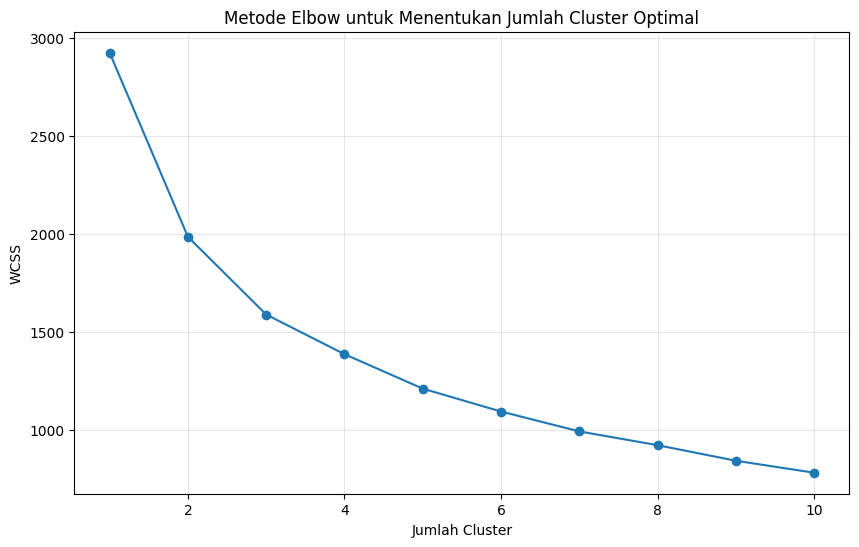

Analisis Karakteristik Cluster:
                       temp       hum  windspeed          cnt       casual  \
usage_level                                                                  
Penggunaan Rendah  0.648360  0.626141   0.168118  5981.884956  1277.303835   
Penggunaan Sedang  0.401444  0.767672   0.174097  3112.566327   455.841837   
Penggunaan Tinggi  0.324742  0.491148   0.245564  3340.596939   498.295918   

                    registered  
usage_level                     
Penggunaan Rendah  4704.581121  
Penggunaan Sedang  2656.724490  
Penggunaan Tinggi  2842.301020  


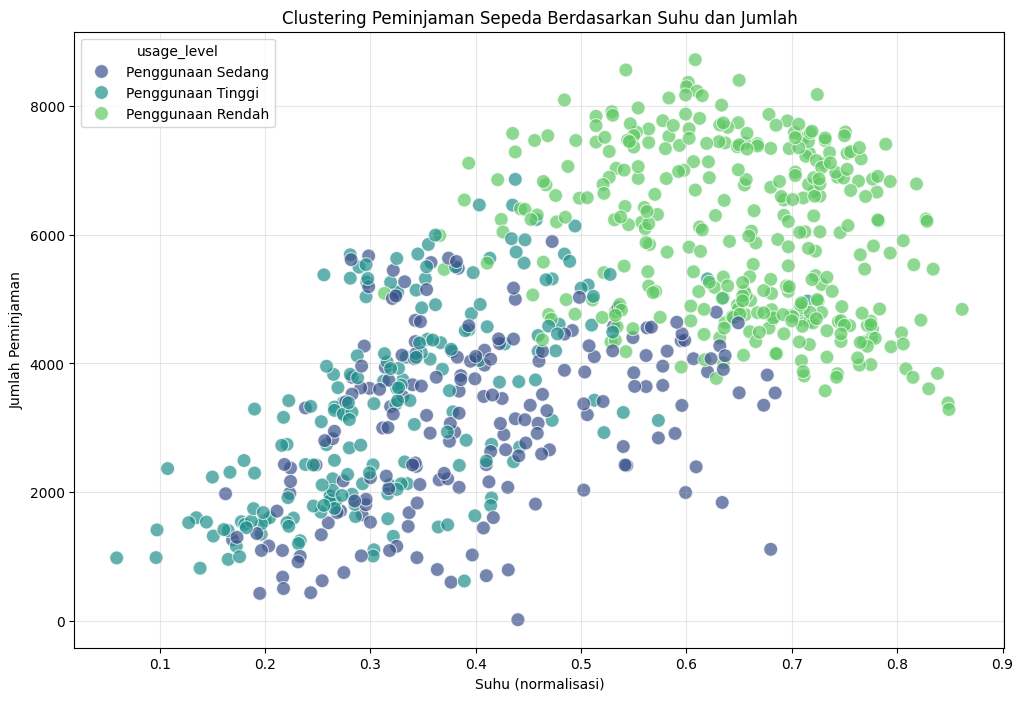

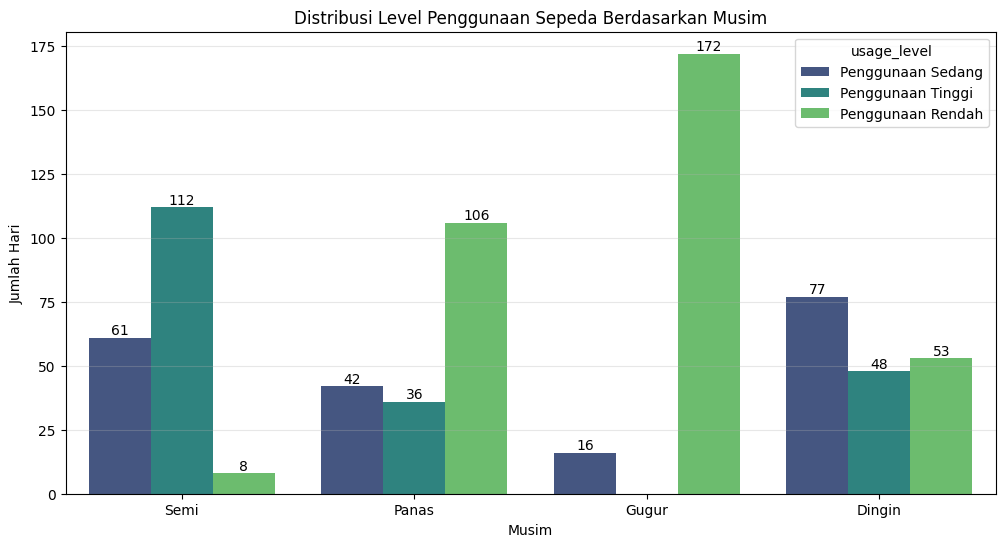

In [ ]:
# Analisis Lanjutan - Clustering
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 

# Memilih fitur untuk clustering
features = day_df[['temp', 'hum', 'windspeed', 'cnt']]

# Normalisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Menentukan jumlah cluster optimal menggunakan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.grid(True, alpha=0.3)
plt.show()

# Berdasarkan metode elbow, misalkan kita pilih 3 cluster
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Menambahkan label cluster ke dataframe asli
day_df['cluster'] = clusters

# Mengganti label cluster menjadi lebih deskriptif
cluster_mapping = {
    0: 'Penggunaan Rendah',
    1: 'Penggunaan Sedang',
    2: 'Penggunaan Tinggi'
}
day_df['usage_level'] = day_df['cluster'].map(cluster_mapping)

# Menganalisis karakteristik setiap cluster
cluster_analysis = day_df.groupby('usage_level')[['temp', 'hum', 'windspeed', 'cnt', 'casual', 'registered']].mean()
print("Analisis Karakteristik Cluster:")
print(cluster_analysis)

# Visualisasi cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='temp', y='cnt', hue='usage_level', data=day_df, palette='viridis', s=100, alpha=0.7)
plt.title('Clustering Peminjaman Sepeda Berdasarkan Suhu dan Jumlah')
plt.xlabel('Suhu (normalisasi)')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True, alpha=0.3)
plt.show()

# Distribusi cluster berdasarkan musim
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='season_label', hue='usage_level', data=day_df, palette='viridis')
plt.title('Distribusi Level Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Hari')
plt.grid(True, alpha=0.3, axis='y')
# Menambahkan anotasi jumlah pada tiap bar
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## Conclusion

Pertanyaan 1: Bagaimana musim dan cuaca mempengaruhi jumlah peminjaman sepeda?

Jumlah peminjaman sepeda sangat dipengaruhi oleh musim, dengan peminjaman tertinggi pada musim panas dan gugur dan terendah pada musim dingin. Cuaca mempengaruhi jumlah peminjaman sepeda, dengan peminjaman tertinggi pada cuaca cerah (rata-rata 4,900 per hari) dan terendah pada salju/hujan ringan (rata-rata 2,600 per hari).
Korelasi positif yang signifikan antara suhu dan jumlah peminjaman sepeda ditemukan (r = 0.63). Ini menunjukkan bahwa lebih tinggi suhu, lebih banyak peminjaman sepeda yang diberikan.
Kelembaban tinggi memiliki korelasi negatif dengan jumlah peminjaman sepeda (r = -0.10), yang menunjukkan bahwa minat pelanggan untuk meminjam sepeda mungkin berkurang karena kelembaban tinggi.


Pertanyaan 2: Bagaimana cara menggunakan sepeda berdasarkan jumlah jam, hari dalam seminggu, dan hari libur?

Sepeda digunakan dalam berbagai waktu, dengan dua puncak utama pada pukul 8 pagi dan 17-18 sore, yang mencerminkan rute komuter.
Pola penggunaan sepeda berbeda signifikan antara hari kerja dan akhir pekan/hari libur:
Hari kerja: Memiliki dua puncak peminjaman, satu pagi dan satu sore, yang disesuaikan dengan jumlah yang digunakan untuk perjalanan ke dan dari tempat kerja.
Akhir pekan/hari libur: Memiliki pola yang lebih rata dengan satu puncak di siang hari, menunjukkan bahwa digunakan lebih banyak untuk rekreasi.
Pada hari Rabu hingga Jumat, jumlah peminjaman sepeda cenderung lebih tinggi daripada hari-hari lainnya dalam seminggu.
Hari libur nasional memiliki rata-rata peminjaman sepeda yang lebih rendah dibandingkan hari kerja biasa.

Berdasarkan hasil analisis clustering, dapat diidentifikasi tiga pola penggunaan sepeda:

Penggunaan Tinggi: Terjadi umumnya pada musim panas dan gugur pada hari-hari dengan suhu tinggi, kelembaban rendah, dan angin yang tidak terlalu kencang.
Penggunaan Sedang: Terjadvi pada hari-hari dengan suhu moderat dan cuaca yang cukup baik.
Penggunaan Rendah: Terjadi pada hari-hari dengan suhu rendah, kelembaban tinggi, atau cuaca buruk, biasanya pada musim dingin.